<a href="https://colab.research.google.com/github/tomonari-masada/course2022-stats1/blob/main/MLE_for_binomial_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 二項分布のパラメータの最尤推定をPyTorchで

In [1]:
import matplotlib.pyplot as plt
import torch

## PyTorchを使った二項分布の作り方

* 総試行回数と、パラメータを指定。

* まずは$\phi=0$と設定して、100回試行の場合の52という回数の対数尤度を求める。
 * 尤度はほぼゼロになる。つまり、$\phi=0$のとき、52回という回数はほぼありえない、ということ。

In [2]:
phi = torch.tensor([0.])
m = torch.distributions.binomial.Binomial(100, probs=phi)

In [3]:
m.log_prob(torch.tensor([52]))

tensor([-762.2994])

* 確率の値に直す。

In [4]:
m.log_prob(torch.tensor([52])).exp()

tensor([0.])

* 次に$\phi=0.5$と設定して、100回試行の場合の52という回数の対数尤度を求める。
 * 尤度は大きくなる。つまり、$\phi=0.5$のときなら、52回という回数はかなりありえる、ということ。

In [5]:
phi = torch.tensor([0.5], requires_grad=True)
m = torch.distributions.binomial.Binomial(100, probs=phi)

In [6]:
m.log_prob(torch.tensor([52]))

tensor([-2.6101], grad_fn=<SubBackward0>)

In [7]:
m.log_prob(torch.tensor([52])).exp()

tensor([0.0735], grad_fn=<ExpBackward0>)

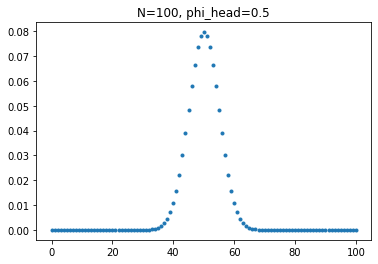

In [8]:
x = range(101)
plt.plot(x, m.log_prob(torch.tensor(x)).exp().detach().numpy(), '.')
plt.title("N=100, phi_head=0.5");

## 対数尤度最大化をPyTorchで実装

* 二項分布のパラメータは、微分可能なテンソルとして作っておく。
* そして、そのパラメータを更新するoptimizerを作る。

In [9]:
phi = torch.tensor([0.132], requires_grad=True) # 適当に初期化
optimizer = torch.optim.SGD([phi], lr=0.001)

* negative log likelihoodを最小化する。
 * PyTorchでは最小化の計算しかできないので、最大化したいときは、マイナスを付けたものを最小化する。

In [10]:
for i in range(30):
  optimizer.zero_grad()
  m = torch.distributions.binomial.Binomial(100, probs=phi)
  loss = - m.log_prob(torch.tensor([52]))
  loss.backward()
  optimizer.step()
  print(f"{i+1} | {phi.item():.4f}")

1 | 0.4706
2 | 0.4905
3 | 0.5023
4 | 0.5094
5 | 0.5136
6 | 0.5162
7 | 0.5177
8 | 0.5186
9 | 0.5192
10 | 0.5195
11 | 0.5197
12 | 0.5198
13 | 0.5199
14 | 0.5199
15 | 0.5200
16 | 0.5200
17 | 0.5200
18 | 0.5200
19 | 0.5200
20 | 0.5200
21 | 0.5200
22 | 0.5200
23 | 0.5200
24 | 0.5200
25 | 0.5200
26 | 0.5200
27 | 0.5200
28 | 0.5200
29 | 0.5200
30 | 0.5200
